Saving winequality-white.csv to winequality-white.csv


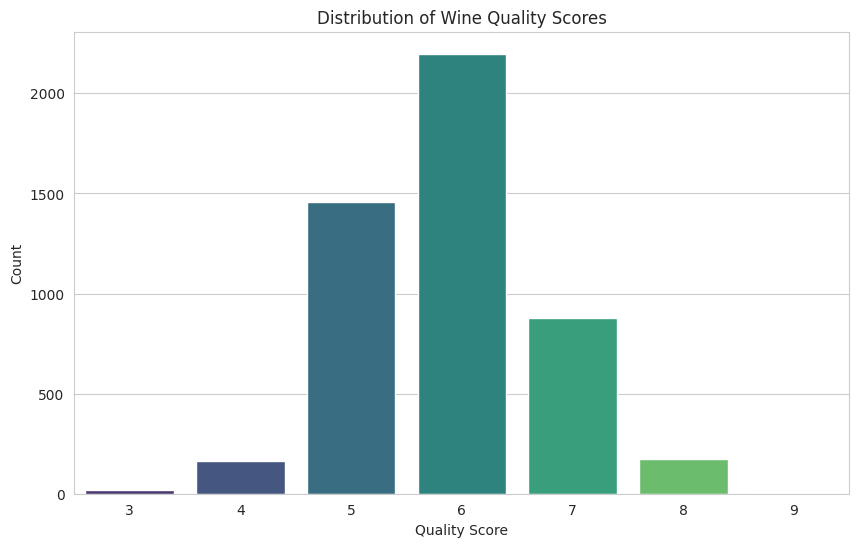

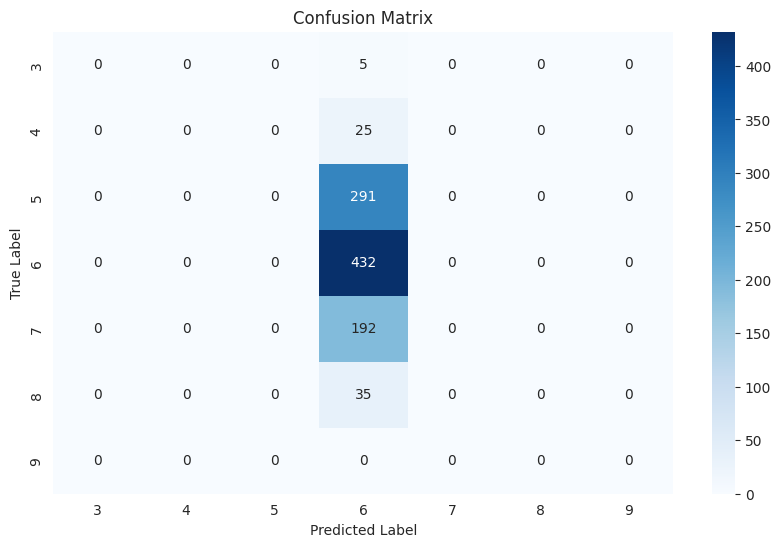

Naive Bayes's Accuracy: 0.44081632653061225691
Naive Bayes's Precision: 0.19431903373594336393
Naive Bayes's Recall: 0.44081632653061225691
Naive Bayes's F1 Score: 0.26973463606405739812


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from google.colab import files


uploaded = files.upload()

# Load the dataset
data = pd.read_csv('winequality-white.csv', sep=';')

# Visualizing the distribution of wine quality scores
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=data, palette='viridis')
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

# Splitting the dataset
X = data.drop("quality", axis=1)
y = data["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the Multinomial Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = nb_classifier.predict(X_test_scaled)

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=sorted(y.unique()))
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Displaying simplified classification metrics with 20 decimal places
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Naive Bayes's Accuracy: {accuracy:.20f}")
print(f"Naive Bayes's Precision: {precision:.20f}")
print(f"Naive Bayes's Recall: {recall:.20f}")
print(f"Naive Bayes's F1 Score: {f1:.20f}")


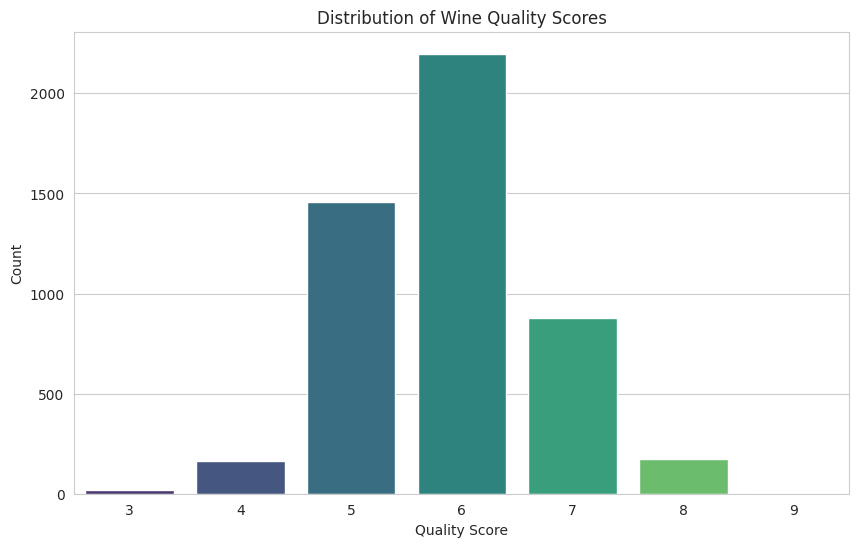

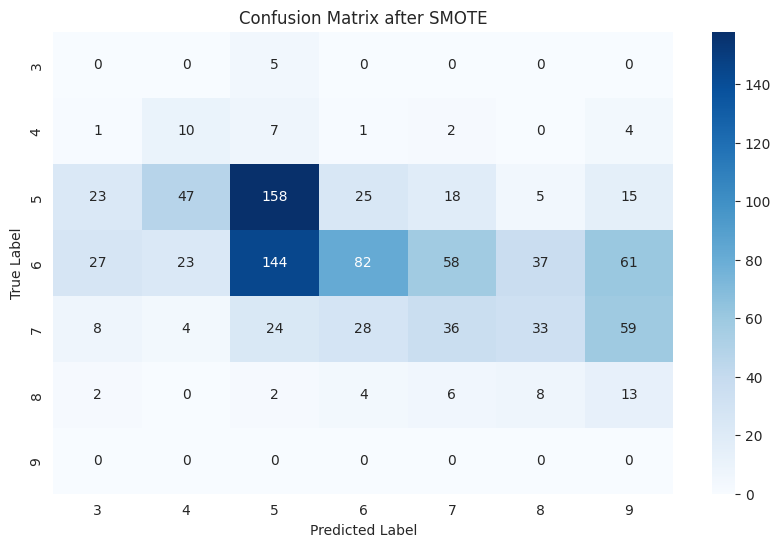

After SMOTE - Naive Bayes's Accuracy: 0.29999999999999998890
After SMOTE - Naive Bayes's Precision: 0.46143639555650139972
After SMOTE - Naive Bayes's Recall: 0.29999999999999998890
After SMOTE - Naive Bayes's F1 Score: 0.32982789511616256162


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the dataset
data = pd.read_csv('winequality-white.csv', sep=';')

# Visualizing the distribution of wine quality scores
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=data, palette='viridis')
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

# Splitting the dataset
X = data.drop("quality", axis=1)
y = data["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Using SMOTE to oversample the minority classes with modified k_neighbors parameter
smote = SMOTE(random_state=42, k_neighbors=2)  # Using 2 as the number of neighbors
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Training the Multinomial Naive Bayes model on the resampled data
nb_classifier_resampled = MultinomialNB()
nb_classifier_resampled.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate on the test set
y_pred_resampled = nb_classifier_resampled.predict(X_test_scaled)

# Plotting the confusion matrix
cm_resampled = confusion_matrix(y_test, y_pred_resampled, labels=sorted(y.unique()))
plt.figure(figsize=(10, 6))
sns.heatmap(cm_resampled, annot=True, fmt="d", cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix after SMOTE")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Displaying simplified classification metrics with 20 decimal places for the resampled model
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
precision_resampled = precision_score(y_test, y_pred_resampled, average='weighted')
recall_resampled = recall_score(y_test, y_pred_resampled, average='weighted')
f1_resampled = f1_score(y_test, y_pred_resampled, average='weighted')

print(f"After SMOTE - Naive Bayes's Accuracy: {accuracy_resampled:.20f}")
print(f"After SMOTE - Naive Bayes's Precision: {precision_resampled:.20f}")
print(f"After SMOTE - Naive Bayes's Recall: {recall_resampled:.20f}")
print(f"After SMOTE - Naive Bayes's F1 Score: {f1_resampled:.20f}")


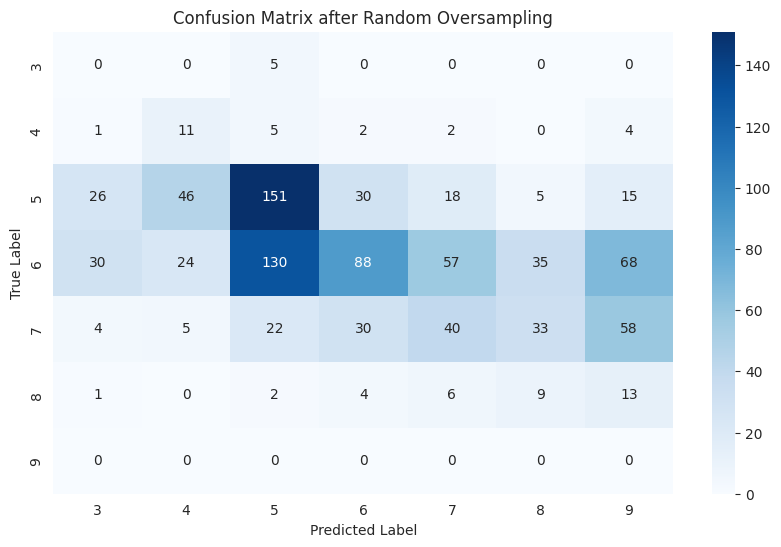

After Random Oversampling - Naive Bayes's Accuracy: 0.30510204081632652517
After Random Oversampling - Naive Bayes's Precision: 0.46513320732230983845
After Random Oversampling - Naive Bayes's Recall: 0.30510204081632652517
After Random Oversampling - Naive Bayes's F1 Score: 0.34068236464766393778


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train_scaled, y_train)

# Training the Multinomial Naive Bayes model on the oversampled data
nb_classifier_oversampled = MultinomialNB()
nb_classifier_oversampled.fit(X_train_oversampled, y_train_oversampled)

# Predict and evaluate on the test set
y_pred_oversampled = nb_classifier_oversampled.predict(X_test_scaled)

# Plotting the confusion matrix for the oversampled model
cm_oversampled = confusion_matrix(y_test, y_pred_oversampled, labels=sorted(y.unique()))
plt.figure(figsize=(10, 6))
sns.heatmap(cm_oversampled, annot=True, fmt="d", cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix after Random Oversampling")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Displaying classification metrics with 20 decimal places for the oversampled model
accuracy_oversampled = accuracy_score(y_test, y_pred_oversampled)
precision_oversampled = precision_score(y_test, y_pred_oversampled, average='weighted')
recall_oversampled = recall_score(y_test, y_pred_oversampled, average='weighted')
f1_oversampled = f1_score(y_test, y_pred_oversampled, average='weighted')

print(f"After Random Oversampling - Naive Bayes's Accuracy: {accuracy_oversampled:.20f}")
print(f"After Random Oversampling - Naive Bayes's Precision: {precision_oversampled:.20f}")
print(f"After Random Oversampling - Naive Bayes's Recall: {recall_oversampled:.20f}")
print(f"After Random Oversampling - Naive Bayes's F1 Score: {f1_oversampled:.20f}")


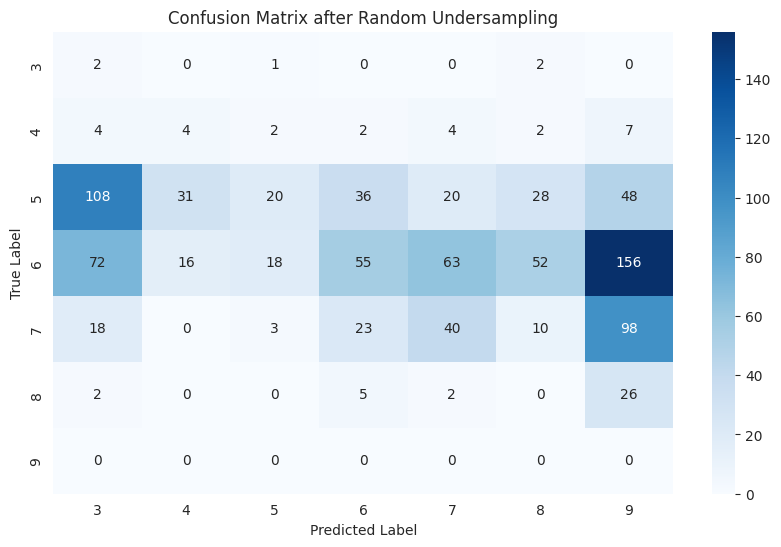

After Random Undersampling - Naive Bayes's Accuracy: 0.12346938775510203634
After Random Undersampling - Naive Bayes's Precision: 0.39814344424524461541
After Random Undersampling - Naive Bayes's Recall: 0.12346938775510203634
After Random Undersampling - Naive Bayes's F1 Score: 0.17474937298941808916


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_scaled, y_train)

# Training the Multinomial Naive Bayes model on the undersampled data
nb_classifier_undersampled = MultinomialNB()
nb_classifier_undersampled.fit(X_train_undersampled, y_train_undersampled)

# Predict and evaluate on the test set
y_pred_undersampled = nb_classifier_undersampled.predict(X_test_scaled)

# Plotting the confusion matrix for the undersampled model
cm_undersampled = confusion_matrix(y_test, y_pred_undersampled, labels=sorted(y.unique()))
plt.figure(figsize=(10, 6))
sns.heatmap(cm_undersampled, annot=True, fmt="d", cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix after Random Undersampling")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Displaying classification metrics with 20 decimal places for the undersampled model
accuracy_undersampled = accuracy_score(y_test, y_pred_undersampled)
precision_undersampled = precision_score(y_test, y_pred_undersampled, average='weighted')
recall_undersampled = recall_score(y_test, y_pred_undersampled, average='weighted')
f1_undersampled = f1_score(y_test, y_pred_undersampled, average='weighted')

print(f"After Random Undersampling - Naive Bayes's Accuracy: {accuracy_undersampled:.20f}")
print(f"After Random Undersampling - Naive Bayes's Precision: {precision_undersampled:.20f}")
print(f"After Random Undersampling - Naive Bayes's Recall: {recall_undersampled:.20f}")
print(f"After Random Undersampling - Naive Bayes's F1 Score: {f1_undersampled:.20f}")


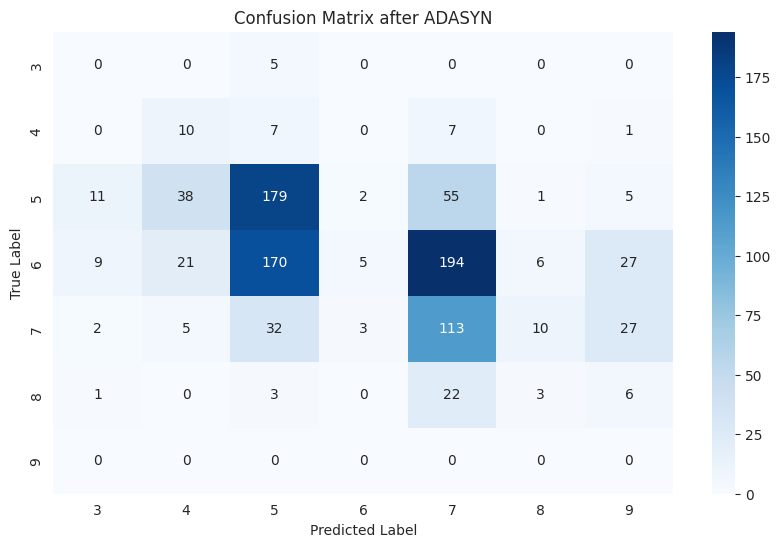

After ADASYN - Naive Bayes's Accuracy: 0.31632653061224491609
After ADASYN - Naive Bayes's Precision: 0.42005586552535767453
After ADASYN - Naive Bayes's Recall: 0.31632653061224491609
After ADASYN - Naive Bayes's F1 Score: 0.24970732692727315438


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from imblearn.over_sampling import ADASYN

# Initialize ADASYN with modified n_neighbors parameter
adasyn = ADASYN(random_state=42, n_neighbors=2)  # Using 2 as the number of neighbors
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_scaled, y_train)

# Training the Multinomial Naive Bayes model on the ADASYN data
nb_classifier_adasyn = MultinomialNB()
nb_classifier_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Predict and evaluate on the test set
y_pred_adasyn = nb_classifier_adasyn.predict(X_test_scaled)

# Plotting the confusion matrix for the ADASYN model
cm_adasyn = confusion_matrix(y_test, y_pred_adasyn, labels=sorted(y.unique()))
plt.figure(figsize=(10, 6))
sns.heatmap(cm_adasyn, annot=True, fmt="d", cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix after ADASYN")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Displaying classification metrics with 20 decimal places for the ADASYN model
accuracy_adasyn = accuracy_score(y_test, y_pred_adasyn)
precision_adasyn = precision_score(y_test, y_pred_adasyn, average='weighted')
recall_adasyn = recall_score(y_test, y_pred_adasyn, average='weighted')
f1_adasyn = f1_score(y_test, y_pred_adasyn, average='weighted')

print(f"After ADASYN - Naive Bayes's Accuracy: {accuracy_adasyn:.20f}")
print(f"After ADASYN - Naive Bayes's Precision: {precision_adasyn:.20f}")
print(f"After ADASYN - Naive Bayes's Recall: {recall_adasyn:.20f}")
print(f"After ADASYN - Naive Bayes's F1 Score: {f1_adasyn:.20f}")


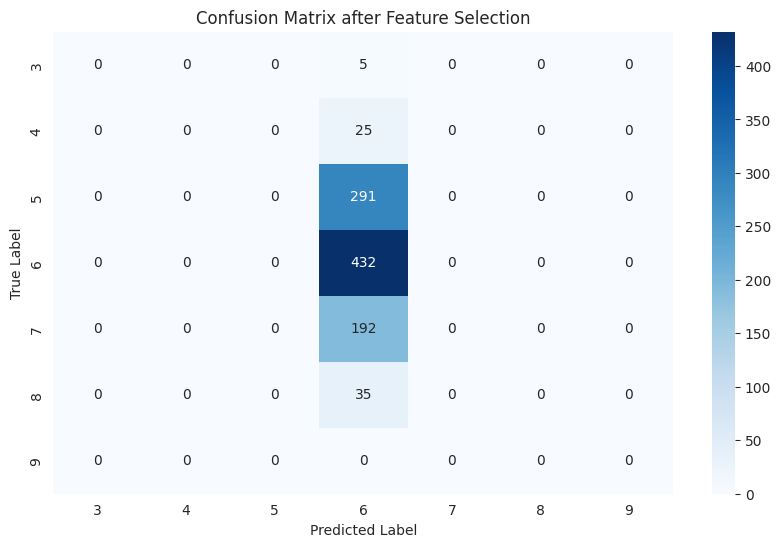

After Feature Selection - Naive Bayes's Accuracy: 0.44081632653061225691
After Feature Selection - Naive Bayes's Precision: 0.19431903373594336393
After Feature Selection - Naive Bayes's Recall: 0.44081632653061225691
After Feature Selection - Naive Bayes's F1 Score: 0.26973463606405739812

Selected features: ['fixed acidity' 'volatile acidity' 'residual sugar' 'chlorides'
 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'alcohol']


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Using SelectKBest to get top features based on univariate statistical tests
selector = SelectKBest(f_classif, k=8)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Identifying the selected features
selected_features = np.array(X.columns)[selector.get_support()]

# Training the Multinomial Naive Bayes model on the selected features
nb_classifier_selected = MultinomialNB()
nb_classifier_selected.fit(X_train_selected, y_train)

# Predict and evaluate on the test set
y_pred_selected = nb_classifier_selected.predict(X_test_selected)

# Plotting the confusion matrix for the model with selected features
cm_selected = confusion_matrix(y_test, y_pred_selected, labels=sorted(y.unique()))
plt.figure(figsize=(10, 6))
sns.heatmap(cm_selected, annot=True, fmt="d", cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix after Feature Selection")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Displaying classification metrics with 20 decimal places for the model with selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)
precision_selected = precision_score(y_test, y_pred_selected, average='weighted')
recall_selected = recall_score(y_test, y_pred_selected, average='weighted')
f1_selected = f1_score(y_test, y_pred_selected, average='weighted')

print(f"After Feature Selection - Naive Bayes's Accuracy: {accuracy_selected:.20f}")
print(f"After Feature Selection - Naive Bayes's Precision: {precision_selected:.20f}")
print(f"After Feature Selection - Naive Bayes's Recall: {recall_selected:.20f}")
print(f"After Feature Selection - Naive Bayes's F1 Score: {f1_selected:.20f}")

print("\nSelected features:", selected_features)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for alpha
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
}

# Using GridSearchCV to find the best alpha
nb_classifier_tuned = MultinomialNB()
grid_search = GridSearchCV(nb_classifier_tuned, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Displaying the best parameter found by grid search
print(f"Best parameter (alpha value): {grid_search.best_params_['alpha']}")

# Training the model with the best alpha
best_alpha = grid_search.best_params_['alpha']
nb_classifier_best_alpha = MultinomialNB(alpha=best_alpha)
nb_classifier_best_alpha.fit(X_train_scaled, y_train)
y_pred_best_alpha = nb_classifier_best_alpha.predict(X_test_scaled)

# Displaying classification metrics with 20 decimal places for the model with best alpha
accuracy_best_alpha = accuracy_score(y_test, y_pred_best_alpha)
precision_best_alpha = precision_score(y_test, y_pred_best_alpha, average='weighted')
recall_best_alpha = recall_score(y_test, y_pred_best_alpha, average='weighted')
f1_best_alpha = f1_score(y_test, y_pred_best_alpha, average='weighted')

print(f"\nAfter Tuning Alpha - Naive Bayes's Accuracy: {accuracy_best_alpha:.20f}")
print(f"After Tuning Alpha - Naive Bayes's Precision: {precision_best_alpha:.20f}")
print(f"After Tuning Alpha - Naive Bayes's Recall: {recall_best_alpha:.20f}")
print(f"After Tuning Alpha - Naive Bayes's F1 Score: {f1_best_alpha:.20f}")


Best parameter (alpha value): 0.001

After Tuning Alpha - Naive Bayes's Accuracy: 0.44081632653061225691
After Tuning Alpha - Naive Bayes's Precision: 0.19431903373594336393
After Tuning Alpha - Naive Bayes's Recall: 0.44081632653061225691
After Tuning Alpha - Naive Bayes's F1 Score: 0.26973463606405739812


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


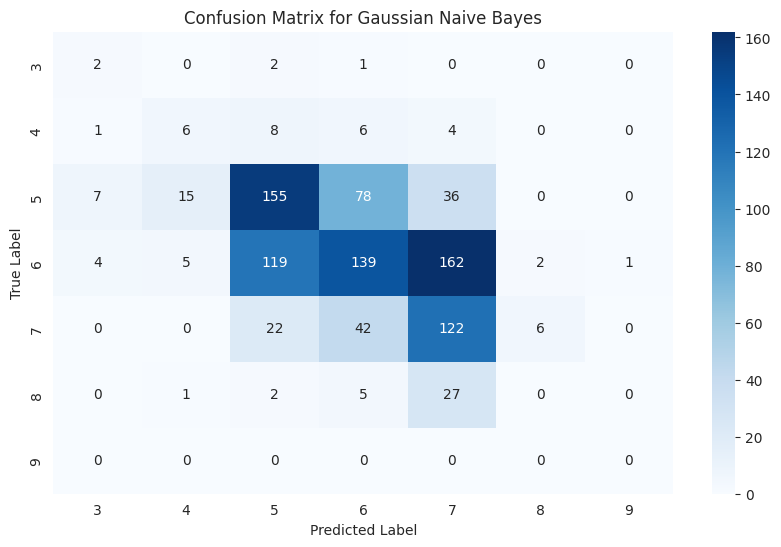

Gaussian Naive Bayes's Accuracy: 0.43265306122448982107
Gaussian Naive Bayes's Precision: 0.45002961733984409021
Gaussian Naive Bayes's Recall: 0.43265306122448982107
Gaussian Naive Bayes's F1 Score: 0.42299252808578324814


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Training the Gaussian Naive Bayes model
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train_scaled, y_train)

# Predict and evaluate on the test set
y_pred_gnb = gnb_classifier.predict(X_test_scaled)

# Plotting the confusion matrix for the Gaussian Naive Bayes model
cm_gnb = confusion_matrix(y_test, y_pred_gnb, labels=sorted(y.unique()))
plt.figure(figsize=(10, 6))
sns.heatmap(cm_gnb, annot=True, fmt="d", cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix for Gaussian Naive Bayes")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Displaying classification metrics with 20 decimal places for the Gaussian Naive Bayes model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb, average='weighted')
recall_gnb = recall_score(y_test, y_pred_gnb, average='weighted')
f1_gnb = f1_score(y_test, y_pred_gnb, average='weighted')

print(f"Gaussian Naive Bayes's Accuracy: {accuracy_gnb:.20f}")
print(f"Gaussian Naive Bayes's Precision: {precision_gnb:.20f}")
print(f"Gaussian Naive Bayes's Recall: {recall_gnb:.20f}")
print(f"Gaussian Naive Bayes's F1 Score: {f1_gnb:.20f}")


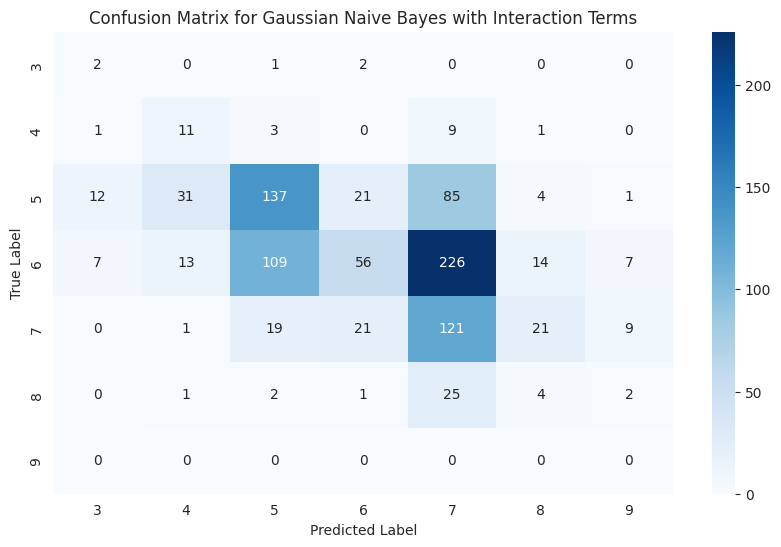

Gaussian Naive Bayes with Interaction Terms - Accuracy: 0.33775510204081632404
Gaussian Naive Bayes with Interaction Terms - Precision: 0.45403107742382636802
Gaussian Naive Bayes with Interaction Terms - Recall: 0.33775510204081632404
Gaussian Naive Bayes with Interaction Terms - F1 Score: 0.32067196293246702510


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Creating polynomial interaction terms (degree=2)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Training the Gaussian Naive Bayes model with interaction terms
gnb_classifier_poly = GaussianNB()
gnb_classifier_poly.fit(X_train_poly, y_train)

# Predict and evaluate on the test set with interaction terms
y_pred_poly = gnb_classifier_poly.predict(X_test_poly)

# Plotting the confusion matrix for the Gaussian Naive Bayes model with interaction terms
cm_poly = confusion_matrix(y_test, y_pred_poly, labels=sorted(y.unique()))
plt.figure(figsize=(10, 6))
sns.heatmap(cm_poly, annot=True, fmt="d", cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix for Gaussian Naive Bayes with Interaction Terms")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Displaying classification metrics with 20 decimal places for the Gaussian Naive Bayes model with interaction terms
accuracy_poly = accuracy_score(y_test, y_pred_poly)
precision_poly = precision_score(y_test, y_pred_poly, average='weighted')
recall_poly = recall_score(y_test, y_pred_poly, average='weighted')
f1_poly = f1_score(y_test, y_pred_poly, average='weighted')

print(f"Gaussian Naive Bayes with Interaction Terms - Accuracy: {accuracy_poly:.20f}")
print(f"Gaussian Naive Bayes with Interaction Terms - Precision: {precision_poly:.20f}")
print(f"Gaussian Naive Bayes with Interaction Terms - Recall: {recall_poly:.20f}")
print(f"Gaussian Naive Bayes with Interaction Terms - F1 Score: {f1_poly:.20f}")


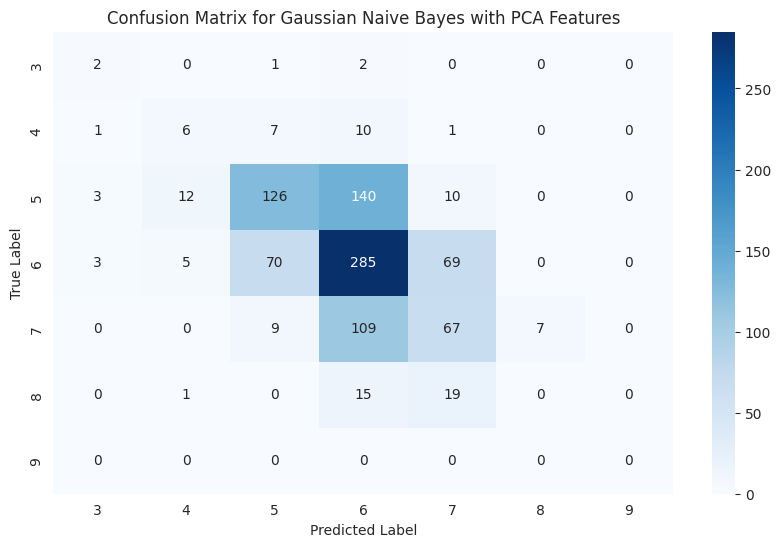

Gaussian Naive Bayes with PCA Features - Accuracy: 0.49591836734693878208
Gaussian Naive Bayes with PCA Features - Precision: 0.48618487012944827663
Gaussian Naive Bayes with PCA Features - Recall: 0.49591836734693878208
Gaussian Naive Bayes with PCA Features - F1 Score: 0.48254364593018650442


In [ ]:
from sklearn.decomposition import PCA

# Applying PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Training the Gaussian Naive Bayes model with PCA features
gnb_classifier_pca = GaussianNB()
gnb_classifier_pca.fit(X_train_pca, y_train)

# Predict and evaluate on the test set with PCA features
y_pred_pca = gnb_classifier_pca.predict(X_test_pca)

# Plotting the confusion matrix for the Gaussian Naive Bayes model with PCA features
cm_pca = confusion_matrix(y_test, y_pred_pca, labels=sorted(y.unique()))
plt.figure(figsize=(10, 6))
sns.heatmap(cm_pca, annot=True, fmt="d", cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix for Gaussian Naive Bayes with PCA Features")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Displaying classification metrics with 20 decimal places for the Gaussian Naive Bayes model with PCA features
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca, average='weighted')
recall_pca = recall_score(y_test, y_pred_pca, average='weighted')
f1_pca = f1_score(y_test, y_pred_pca, average='weighted')

print(f"Gaussian Naive Bayes with PCA Features - Accuracy: {accuracy_pca:.20f}")
print(f"Gaussian Naive Bayes with PCA Features - Precision: {precision_pca:.20f}")
print(f"Gaussian Naive Bayes with PCA Features - Recall: {recall_pca:.20f}")
print(f"Gaussian Naive Bayes with PCA Features - F1 Score: {f1_pca:.20f}")


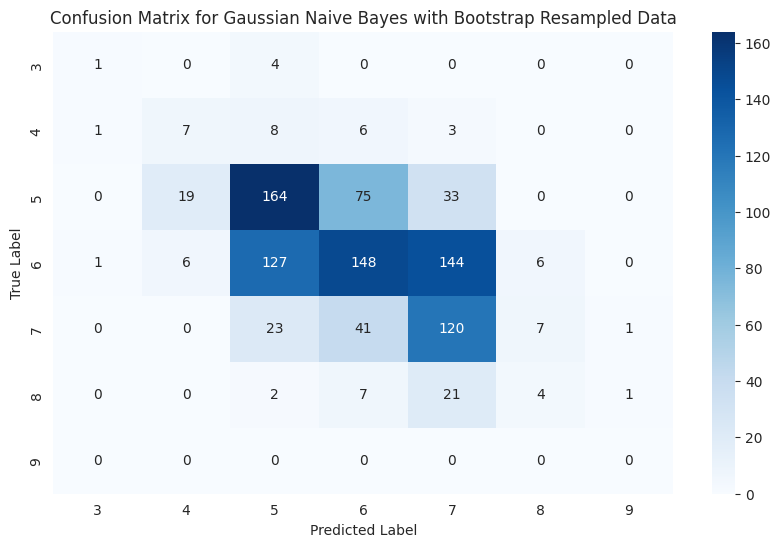

Gaussian Naive Bayes with Bootstrap Resampled Data - Accuracy: 0.45306122448979591066
Gaussian Naive Bayes with Bootstrap Resampled Data - Precision: 0.47292071040349742406
Gaussian Naive Bayes with Bootstrap Resampled Data - Recall: 0.45306122448979591066
Gaussian Naive Bayes with Bootstrap Resampled Data - F1 Score: 0.44607352033946984227


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.utils import resample

# Bootstrap resampling
X_resampled, y_resampled = resample(X_train_scaled, y_train, replace=True, n_samples=len(X_train_scaled), random_state=42)

# Training the Gaussian Naive Bayes model with resampled data
gnb_classifier_bootstrap = GaussianNB()
gnb_classifier_bootstrap.fit(X_resampled, y_resampled)

# Predict and evaluate on the test set with resampled data
y_pred_bootstrap = gnb_classifier_bootstrap.predict(X_test_scaled)

# Plotting the confusion matrix for the Gaussian Naive Bayes model with bootstrap resampled data
cm_bootstrap = confusion_matrix(y_test, y_pred_bootstrap, labels=sorted(y.unique()))
plt.figure(figsize=(10, 6))
sns.heatmap(cm_bootstrap, annot=True, fmt="d", cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix for Gaussian Naive Bayes with Bootstrap Resampled Data")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Displaying classification metrics with 20 decimal places for the Gaussian Naive Bayes model with bootstrap resampled data
accuracy_bootstrap = accuracy_score(y_test, y_pred_bootstrap)
precision_bootstrap = precision_score(y_test, y_pred_bootstrap, average='weighted')
recall_bootstrap = recall_score(y_test, y_pred_bootstrap, average='weighted')
f1_bootstrap = f1_score(y_test, y_pred_bootstrap, average='weighted')

print(f"Gaussian Naive Bayes with Bootstrap Resampled Data - Accuracy: {accuracy_bootstrap:.20f}")
print(f"Gaussian Naive Bayes with Bootstrap Resampled Data - Precision: {precision_bootstrap:.20f}")
print(f"Gaussian Naive Bayes with Bootstrap Resampled Data - Recall: {recall_bootstrap:.20f}")
print(f"Gaussian Naive Bayes with Bootstrap Resampled Data - F1 Score: {f1_bootstrap:.20f}")
